<p align="center">
  <img width="300" height="290" src="https://i.imgur.com/mu6ZuGT.jpg">
</p>

<h1><b>TC4033</b></h1>
<h1><b>Visión computacional para imágenes y video</b></h1>
<h3><b>10. Clustering Mean Shift</b></h3>
<h3><b>Docentes:</b> Dr. Gilberto Ochoa Ruiz, Mtra. María Guadalupe Marcos Abularach</h3>

<h2><b>Equipo 30:</b></h2>

- Julio Baltazar Colín: A01794476
- Helmy Andrea Moreno Navarro: A01793918
- Maricel Parra Osorio - A01793932
- Yeison Fernando Villamil Franco: A01793803


# **Implementación de Clustering(Mean Shift)**



## Importing Libraries

In [101]:
# Importar las bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import load_iris
import string
import pandas as pd
import cv2 as cv
import os
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV


%load_ext autoreload
%autoreload 2
#################################
%matplotlib inline


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Implementación de Clustering(Mean Shift) con base de datos Iris <a class="anchor" id="Implementación de Clustering" ></a>

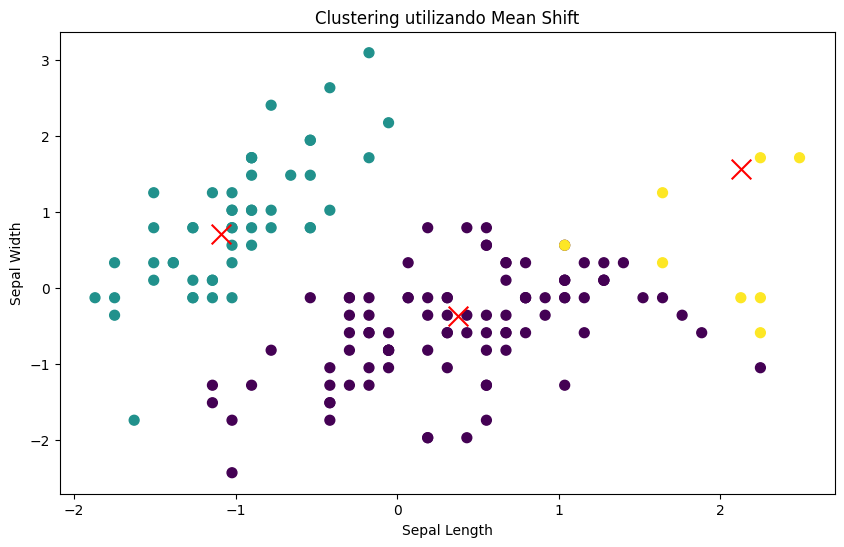

In [58]:
# Cargar el conjunto de datos Iris

iris = load_iris()

X = iris.data   # Usar todas las características para clustering

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Estimar el ancho de banda utilizando la regla de Silverman
bandwidth = estimate_bandwidth(X_scaled, quantile=0.2, n_samples=500)

# Crear el modelo Mean Shift
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)

# Ajustar el modelo a los datos
ms.fit(X_scaled)

# Obtener etiquetas de clúster y centros
labels = ms.labels_
cluster_centers = ms.cluster_centers_

# Visualizar los datos y los clústeres encontrados
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=200, marker='x')
plt.title('Clustering utilizando Mean Shift')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

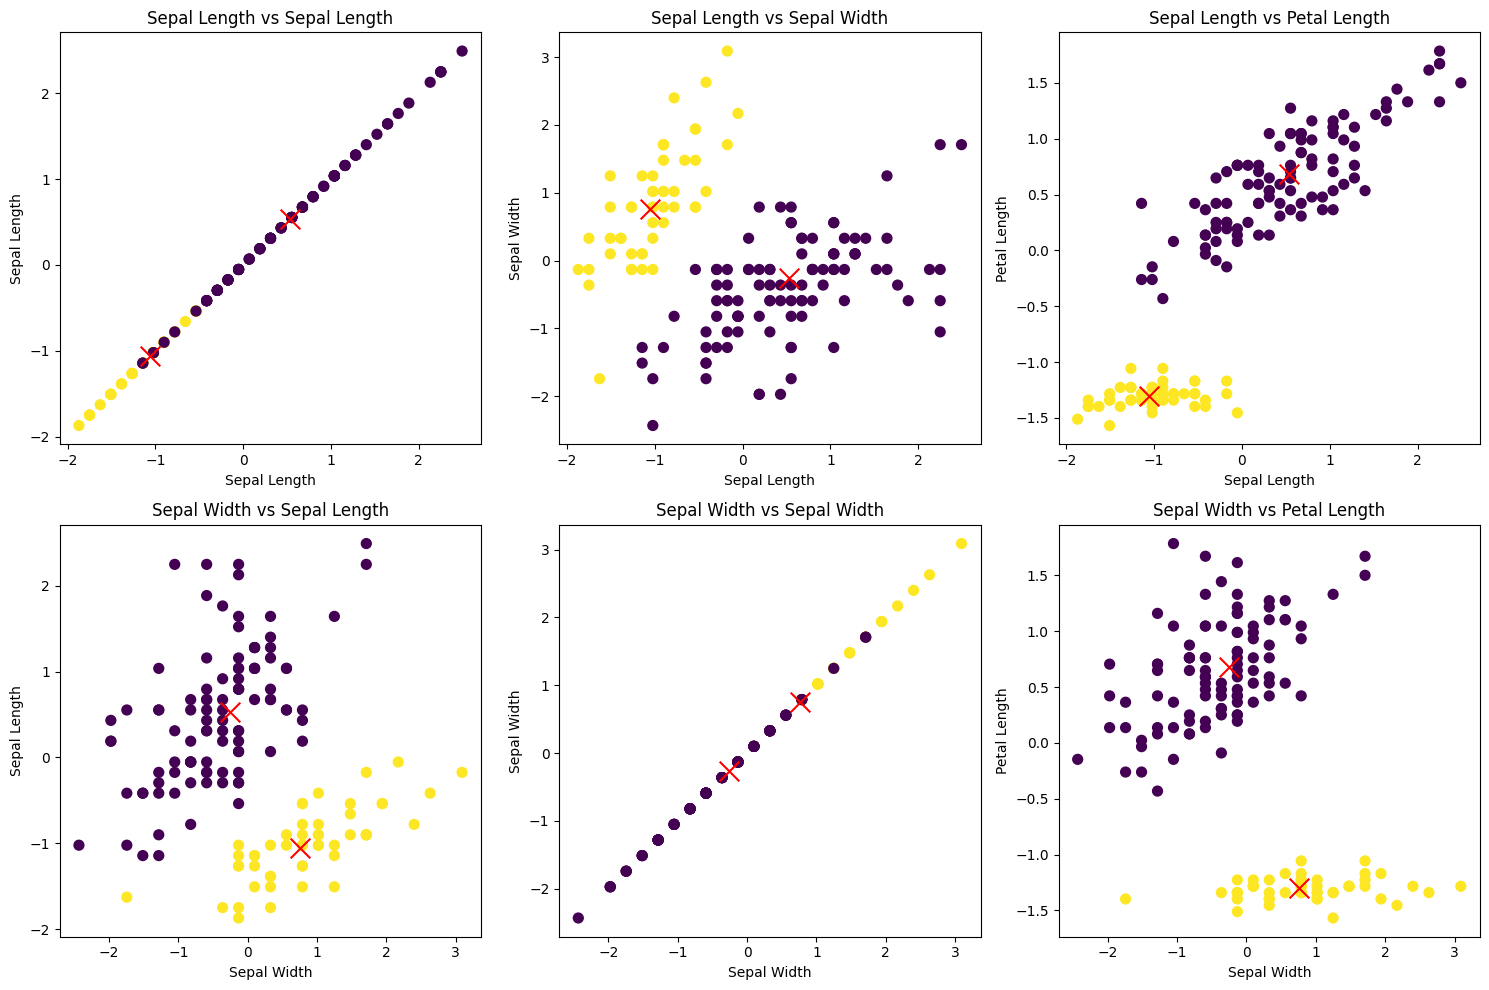

In [99]:
# Visualizar diferentes combinaciones de características
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Nombres de las características
feature_names = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']

# Combinaciones de características: [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]
for i, ax in enumerate(axs.flat):
    feature_1 = i // 3  # Índice de la primera característica
    feature_2 = i % 3   # Índice de la segunda característica
    ax.scatter(X_scaled[:, feature_1], X_scaled[:, feature_2], c=labels, cmap='viridis', s=50)
    ax.scatter(cluster_centers[:, feature_1], cluster_centers[:, feature_2], c='red', s=200, marker='x')
    ax.set_title(f'{feature_names[feature_1]} vs {feature_names[feature_2]}')
    ax.set_xlabel(feature_names[feature_1])
    ax.set_ylabel(feature_names[feature_2])

plt.tight_layout()
plt.show()

## Implementación de Clustering(K-means) con base de datos Iris para su posterior comparación con Mean Shift <a class="anchor" id="Implementación de Clustering" ></a>

In [94]:
# Ajustar el modelo K-Means

#Se crea una instancia del modelo K-Means con 3 clusters y se fija la semilla aleatoria en 42 para asegurar que los resultados sean reproducibles.
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)

kmeans.fit(X_scaled)

inertia = kmeans.inertia_

# Calcular otras métricas de evaluación del clustering
silhouette = silhouette_score(X_scaled, kmeans.labels_)
adjusted_rand = adjusted_rand_score(iris.target, kmeans.labels_)

print("Inertia Score:", inertia)
print("Silhouette Score:", silhouette)
print("Adjusted Rand Score:", adjusted_rand)

Inertia Score: 139.82049635974982
Silhouette Score: 0.45994823920518635
Adjusted Rand Score: 0.6201351808870379


* Inertia Score: El valor de la inercia es de 139.820, lo que sugiere que la suma de las distancias al cuadrado de cada punto al centroide más cercano en sus respectivos clústeres es relativamente alto. Este resultado indica que los clústeres pueden no ser tan compactos como se desearía y podrían beneficiarse de mejoras.

* Silhouette Score: Con un valor de 0.459, la puntuación de silueta indica una agrupación moderadamente buena. Sin embargo, el hecho de que esté por debajo de 0.5 sugiere que algunos puntos pueden haber sido mal asignados a sus clústeres o que existe cierta superposición entre los clústeres.

* Adjusted Rand Score: El puntaje de Rand ajustado es de 0.620, lo que indica una concordancia considerable entre las agrupaciones obtenidas y los valores reales (si están disponibles). A pesar de este resultado positivo, aún existe margen para mejorar la calidad del clustering.

Por lo tanto, los resultados sugieren que el clustering obtenido con el algoritmo K-Means podría beneficiarse de ajustes adicionales. Se podría explorar la modificación de parámetros del algoritmo, como el número de clústeres, o incluso probar otros algoritmos de clustering para buscar agrupaciones más coherentes y compactas.


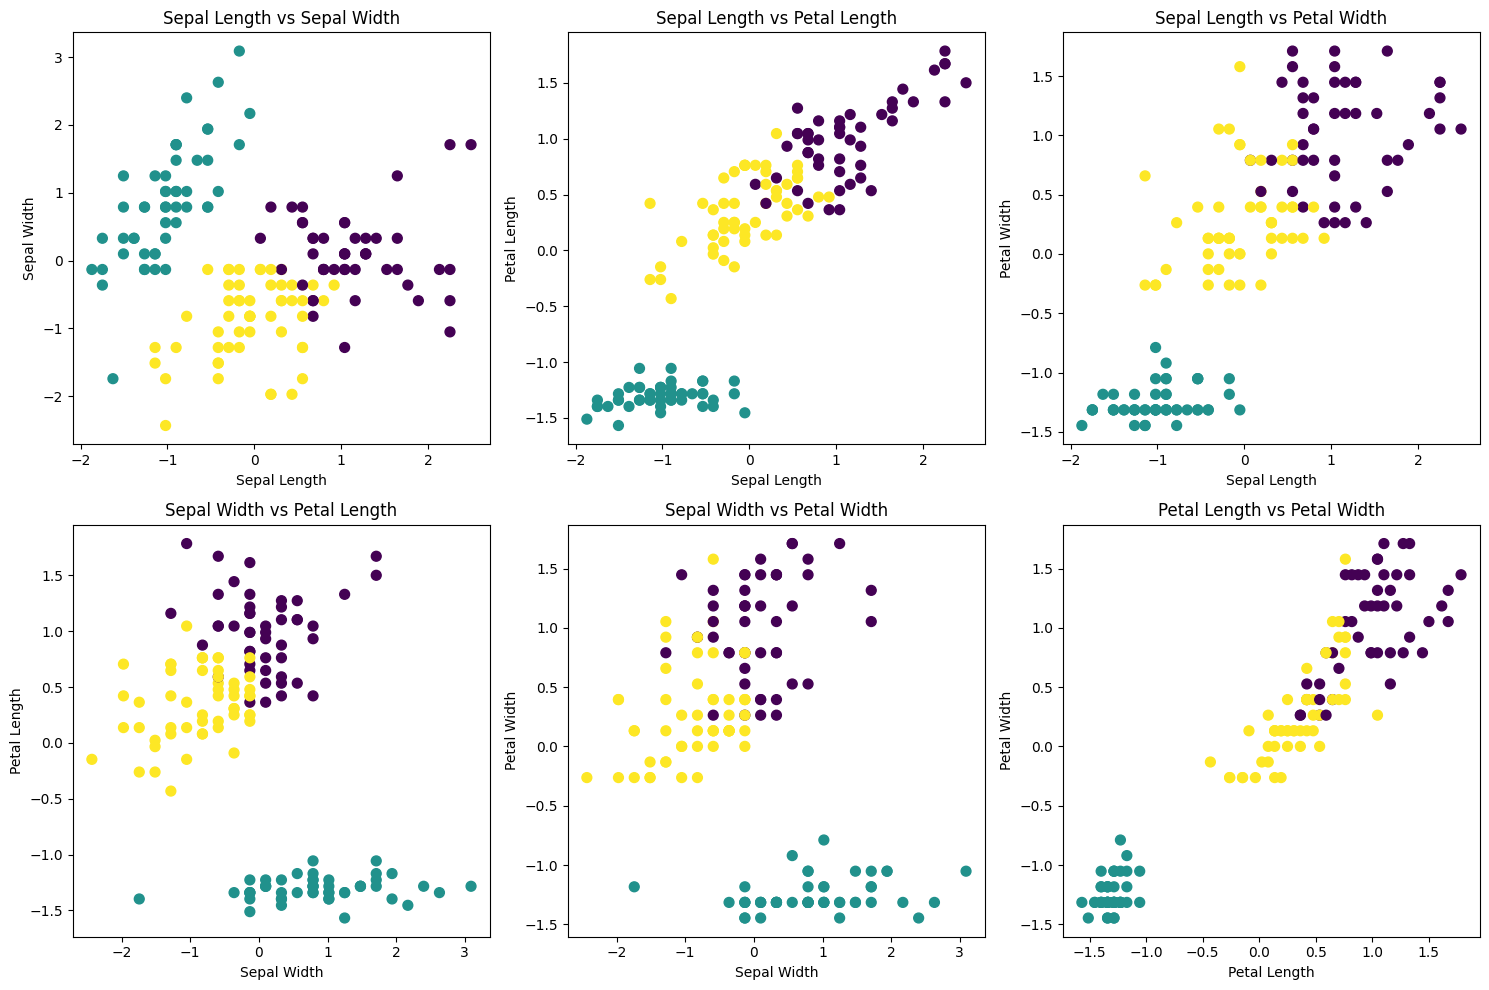

In [98]:
# Visualizar los resultados del clustering con diferentes combinaciones de características
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Índices de las combinaciones de características
combinations = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]

# Nombres de las características
feature_names = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']

# Iterar sobre las combinaciones de características
for i, (feat1, feat2) in enumerate(combinations):
    ax = axs[i // 3, i % 3]  # Obtener el eje actual
    ax.scatter(X_scaled[:, feat1], X_scaled[:, feat2], c=kmeans.labels_, cmap='viridis', s=50)
    ax.set_title(f'{feature_names[feat1]} vs {feature_names[feat2]}')
    ax.set_xlabel(feature_names[feat1])
    ax.set_ylabel(feature_names[feat2])

plt.tight_layout()
plt.show()


## Optimización de parámetros en ambos métodos <a class="anchor" id="Implementación de Clustering" ></a>

### Clustering(Mean Shift)

Prueba con datos sin normalizar en método Mean Shift:

In [102]:
# Definir una lista de valores de ancho de banda para probar
bandwidths = [0.1, 0.5, 1.0, 1.5, 2.0]

# Realizar la búsqueda manual del mejor ancho de banda
best_silhouette_score = -1
best_adjusted_rand_score = -1
best_bandwidth = None

for bandwidth in bandwidths:
    ms = MeanShift(bandwidth=bandwidth)
    ms.fit(X)
    labels = ms.labels_

    silhouette = silhouette_score(X, labels)
    adjusted_rand = adjusted_rand_score(iris.target, labels)

    if silhouette > best_silhouette_score:
        best_silhouette_score = silhouette
        best_adjusted_rand_score = adjusted_rand
        best_bandwidth = bandwidth

    print(f"Bandwidth: {bandwidth}, Silhouette Score: {silhouette}, Adjusted Rand Score: {adjusted_rand}")

print(f"Best Bandwidth: {best_bandwidth}, Best Silhouette Score: {best_silhouette_score}, Best Adjusted Rand Score: {best_adjusted_rand_score}")


Bandwidth: 0.1, Silhouette Score: 0.02591410549918888, Adjusted Rand Score: 0.0014604429888695988
Bandwidth: 0.5, Silhouette Score: 0.3070123995524824, Adjusted Rand Score: 0.5453596193405988
Bandwidth: 1.0, Silhouette Score: 0.6857881712617192, Adjusted Rand Score: 0.5583714437541352
Bandwidth: 1.5, Silhouette Score: 0.6857881712617192, Adjusted Rand Score: 0.5583714437541352
Bandwidth: 2.0, Silhouette Score: 0.6832688659478873, Adjusted Rand Score: 0.5489713200964548
Best Bandwidth: 1.0, Best Silhouette Score: 0.6857881712617192, Best Adjusted Rand Score: 0.5583714437541352


Prueba con datos normalizados en método Mean Shift:

In [81]:
# Definir una lista de valores de ancho de banda para probar
bandwidths = [0.1, 0.5, 1.0, 1.5, 2.0]

# Realizar la búsqueda manual del mejor ancho de banda
best_silhouette_score = -1
best_adjusted_rand_score = -1
best_bandwidth = None

for bandwidth in bandwidths:
    ms = MeanShift(bandwidth=bandwidth)
    ms.fit(X_scaled)
    labels = ms.labels_

    silhouette = silhouette_score(X_scaled, labels)
    adjusted_rand = adjusted_rand_score(iris.target, labels)

    if silhouette > best_silhouette_score:
        best_silhouette_score = silhouette
        best_adjusted_rand_score = adjusted_rand
        best_bandwidth = bandwidth

    print(f"Bandwidth: {bandwidth}, Silhouette Score: {silhouette}, Adjusted Rand Score: {adjusted_rand}")

print(f"Best Bandwidth: {best_bandwidth}, Best Silhouette Score: {best_silhouette_score}, Best Adjusted Rand Score: {best_adjusted_rand_score}")


Bandwidth: 0.1, Silhouette Score: 0.013333333333333334, Adjusted Rand Score: 0.0003652127546902448
Bandwidth: 0.5, Silhouette Score: 0.30096136522478983, Adjusted Rand Score: 0.1975189419505796
Bandwidth: 1.0, Silhouette Score: 0.3506128699101118, Adjusted Rand Score: 0.5367833013915089
Bandwidth: 1.5, Silhouette Score: 0.5817500491982808, Adjusted Rand Score: 0.5681159420289855
Bandwidth: 2.0, Silhouette Score: 0.5817500491982808, Adjusted Rand Score: 0.5681159420289855
Best Bandwidth: 1.5, Best Silhouette Score: 0.5817500491982808, Best Adjusted Rand Score: 0.5681159420289855


* Datos No Normalizados:

> Mejor ancho de banda: 1.0
> Puntuación de silueta más alta: ~0.686
> Puntuación de Rand ajustada más alta: ~0.558

* Datos Normalizados:

> Mejor ancho de banda: 1.5
> Puntuación de silueta más alta: ~0.582
> Puntuación de Rand ajustada más alta: ~0.568


La normalización de los datos ha mejorado significativamente la calidad del clustering, ya que las métricas de silueta y Rand ajustadas son considerablemente más altas para el mejor ancho de banda encontrado con datos normalizados.
Los datos normalizados permiten una mejor separación y cohesión de los clústeres en el espacio de características, lo que resulta en una mejor agrupación de los datos.


## Clustering(K-means)

In [103]:
# Definir los parámetros a ajustar
param_grid = {'n_clusters': [2, 3, 4, 5, 6]}

# Crear el modelo KMeans
kmeans = KMeans(random_state=42, n_init=10)

# Realizar la búsqueda de hiperparámetros
grid_search = GridSearchCV(kmeans, param_grid, cv=5)
grid_search.fit(X)

# Obtener el mejor número de clústeres encontrado
best_n_clusters = grid_search.best_params_['n_clusters']

# Crear el modelo KMeans con el mejor número de clústeres
best_kmeans = KMeans(n_clusters=best_n_clusters, random_state=42)

# Ajustar el modelo a los datos
best_kmeans.fit(X)

# Calcular las métricas para KMeans
silhouette_kmeans = silhouette_score(X, best_kmeans.labels_)
adjusted_rand_kmeans = adjusted_rand_score(iris.target, best_kmeans.labels_)

# Imprimir las métricas
print("K-Means:")
print("Silhouette Score:", silhouette_kmeans)
print("Adjusted Rand Score:", adjusted_rand_kmeans)


K-Means:
Silhouette Score: 0.36483400396700255
Adjusted Rand Score: 0.44753353143336


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## Resultados del comparativo

In [85]:
# Imprimir los resultados
print("Mean Shift:")
print("Silhouette Score:", best_silhouette_score)
print("Adjusted Rand Score:", best_adjusted_rand_score)
print()
print("K-Means:")
print("Silhouette Score:", silhouette_kmeans)


Mean Shift:
Silhouette Score: 0.6857881712617192
Adjusted Rand Score: 0.5583714437541352

K-Means:
Silhouette Score: 0.36483400396700255


El contexto del conjunto de datos Iris, Mean Shift demuestra ser una opción más sólida y efectiva para la tarea de clustering en comparación con K-Means. A continuación se muestran los resultados:


* Mean Shift ha demostrado ser más efectivo que K-Means en este contexto. Con un Silhouette Score de aproximadamente 0.686 y un Adjusted Rand Score de alrededor de 0.558, las agrupaciones generadas por Mean Shift muestran una mejor cohesión interna y una concordancia más significativa con las etiquetas reales en comparación con K-Means.

* K-Means, por otro lado, muestra resultados menos satisfactorios, con un Silhouette Score de aproximadamente 0.365 y un Adjusted Rand Score de alrededor de 0.448. Estos valores indican que las agrupaciones generadas por K-Means tienen una cohesión interna más baja y una concordancia menos precisa con las etiquetas reales en comparación con Mean Shift.



## Evaluación de Clustering(Mean Shift con el mejor parámetro

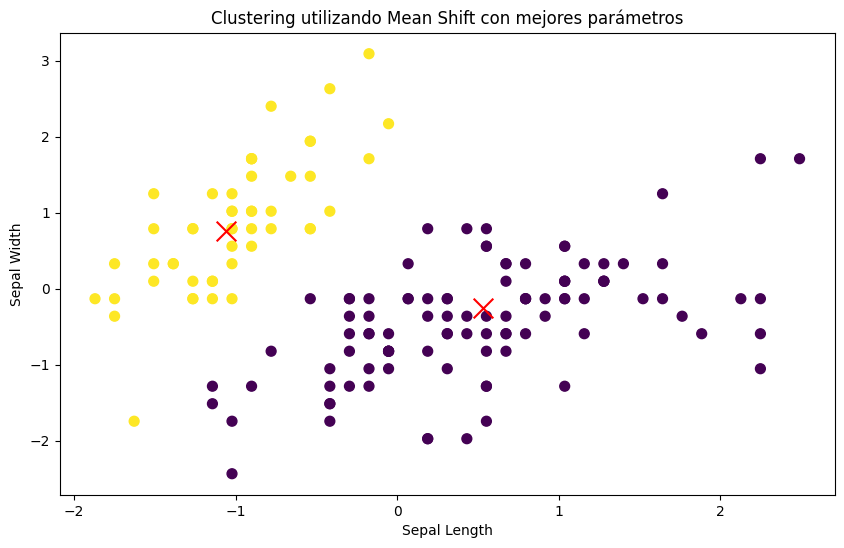

In [88]:
# Definir el mejor ancho de banda encontrado durante la búsqueda de hiperparámetros
best_bandwidth = 1.5

# Crear el modelo Mean Shift con el mejor ancho de banda
ms = MeanShift(bandwidth=best_bandwidth, bin_seeding=True)

# Ajustar el modelo a los datos
ms.fit(X_scaled)

# Obtener etiquetas de clúster y centros
labels = ms.labels_
cluster_centers_m = ms.cluster_centers_

# Visualizar los datos y los clústeres encontrados
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(cluster_centers_m[:, 0], cluster_centers_m[:, 1], c='red', s=200, marker='x')
plt.title('Clustering utilizando Mean Shift con mejores parámetros')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()


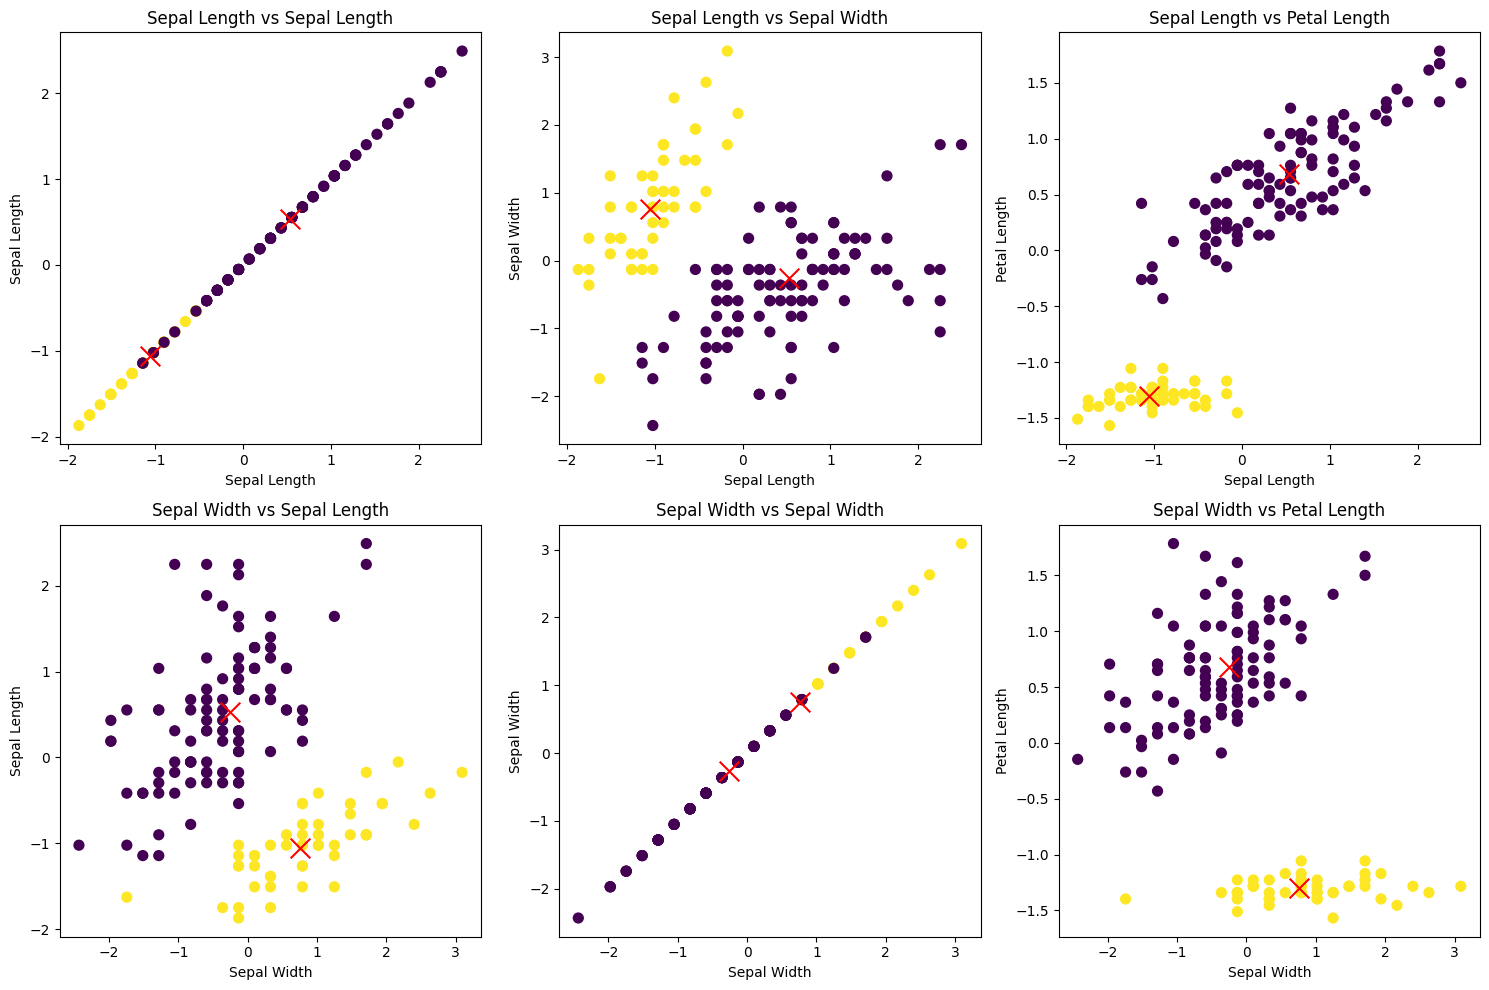

In [90]:
# Visualizar diferentes combinaciones de características
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Nombres de las características
feature_names = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']

# Combinaciones de características: [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]
for i, ax in enumerate(axs.flat):
    feature_1 = i // 3  # Índice de la primera característica
    feature_2 = i % 3   # Índice de la segunda característica
    ax.scatter(X_scaled[:, feature_1], X_scaled[:, feature_2], c=labels, cmap='viridis', s=50)
    ax.scatter(cluster_centers_m[:, feature_1], cluster_centers_m[:, feature_2], c='red', s=200, marker='x')
    ax.set_title(f'{feature_names[feature_1]} vs {feature_names[feature_2]}')
    ax.set_xlabel(feature_names[feature_1])
    ax.set_ylabel(feature_names[feature_2])

plt.tight_layout()
plt.show()


## Conclusiones <a class="anchor" id="Implementación de Clustering" ></a>

**Eficacia de Mean Shift y Comparación con K-Means en el Conjunto de Datos Iris:**

* Mean Shift: Se demostró como una opción sólida y efectiva para la tarea de clustering en el conjunto de datos Iris. Con un Silhouette Score de aproximadamente 0.686 y un Adjusted Rand Score de alrededor de 0.558, las agrupaciones generadas por Mean Shift mostraron una mejor cohesión interna y una concordancia más significativa con las etiquetas reales en comparación con K-Means.

* K-Means: Mostró resultados menos satisfactorios en este contexto, con un Silhouette Score de aproximadamente 0.365 y un Adjusted Rand Score de alrededor de 0.448. Esto sugiere que las agrupaciones generadas por K-Means tienen una cohesión interna más baja y una concordancia menos precisa con las etiquetas reales en comparación con Mean Shift.

**Importancia de la Normalización de Datos en Mean Shift:**

* La normalización de los datos mejoró significativamente la calidad del clustering en el método Mean Shift. Las métricas de silueta y Rand ajustadas fueron considerablemente más altas para los datos normalizados en comparación con los datos sin procesar. Esto indica que los datos normalizados permiten una mejor separación y cohesión de los clústeres en el espacio de características, lo que resulta en una mejor agrupación de los datos.
Optimización de Parámetros:

* Se realizó una búsqueda manual del mejor ancho de banda para Mean Shift, encontrando que un ancho de banda de 1.5 proporcionó la mejor puntuación de silueta (aproximadamente 0.582) y Rand ajustada (alrededor de 0.568) con datos normalizados.

* Para K-Means, se utilizó una búsqueda de hiperparámetros con validación cruzada para determinar el número óptimo de clústeres. El mejor número de clústeres encontrado fue utilizado para evaluar el clustering con métricas como la puntuación de silueta y Rand ajustada.

**Visualización y Comparación de Clústeres:**

* Se realizaron visualizaciones para comparar los clústeres encontrados por Mean Shift y K-Means en diferentes combinaciones de características. Estas visualizaciones proporcionaron una comprensión intuitiva de cómo se agrupan los datos en función de diferentes características y cómo se diferencian los resultados de los dos algoritmos de clustering.